## 1 - Introduction to Time Series Analysis

### 1.1 Introduction to Time Series Data
**Definition**: A time series is a sequence of data points typically measured at successive points in time spaced at uniform time intervals.

**Examples**: Stock prices, weather data, sales data, etc.

**Applications**: Forecasting, anomaly detection, pattern recognition, etc.


### 1.2 Generating and Inspecting Simulated Time Series Data

In [2]:
import pandas as pd # for data analysis
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for data visualizations

               Value
2020-01-01  1.764052
2020-01-02  2.164210
2020-01-03  3.142948
2020-01-04  5.383841
2020-01-05  7.251399
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2020-01-01 to 2020-04-09
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB
None


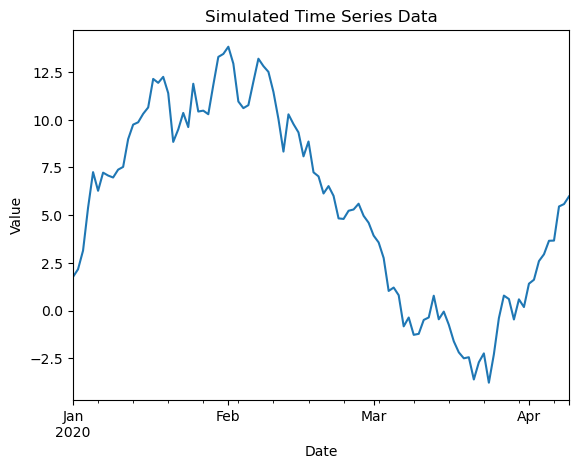

In [3]:
# Generate date range
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')

# Simulate time series data (e.g., a random walk)
np.random.seed(0) # set seed to 0
data = np.random.randn(100).cumsum() 
# cumulative sum an array of 100 random numbers (normal distribution)
# each element is the cumulative sum of the previous random numbers

# Create a DataFrame
df = pd.DataFrame(data, index=dates, columns=['Value'])

# Inspect the dataset
print(df.head()) # display first few data points
print(df.info()) # display more info


# Plot the time series
df['Value'].plot(title='Simulated Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

### 1.3 Line Plots and Histograms

In [4]:
import seaborn as sns # also for visualizations

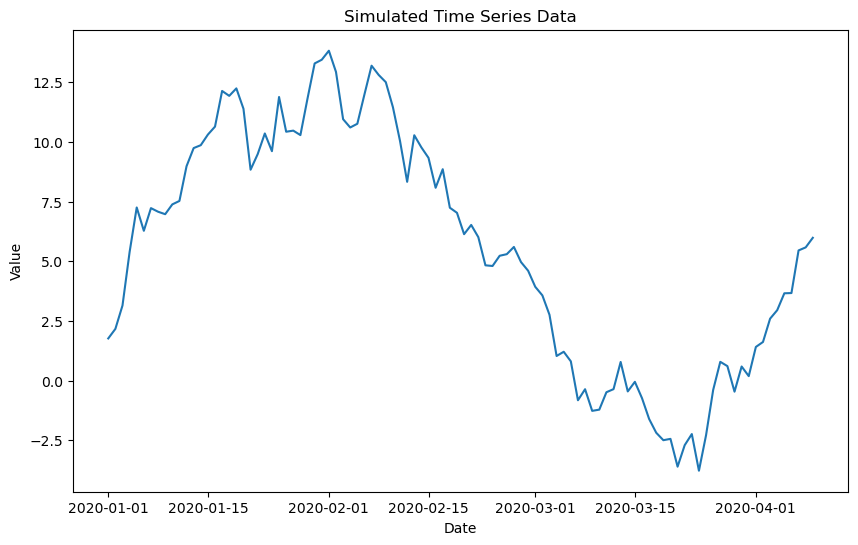

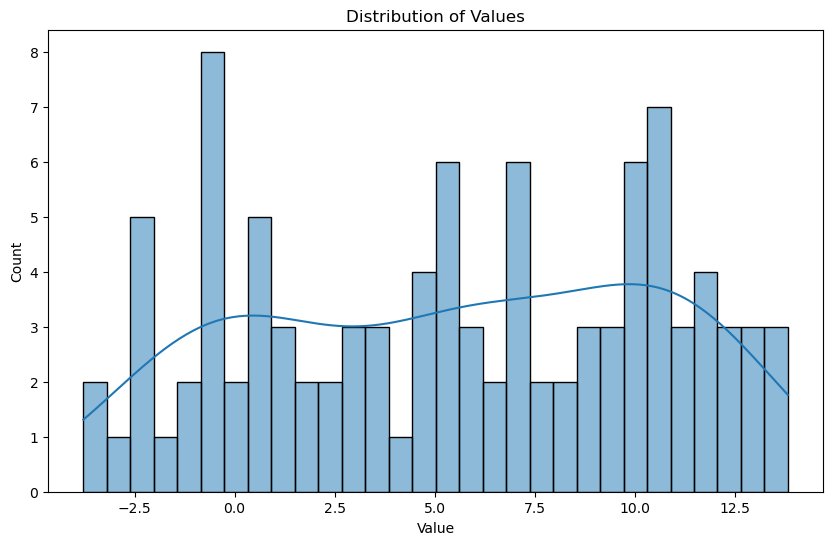

In [5]:
# Line plot
plt.figure(figsize=(10, 6))
plt.plot(df['Value'])
plt.title('Simulated Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], bins=30, kde=True) # KDE: kernel density estimates
# KDE plot adds a smooth curve that can help identify the general shape and characteristics of the data distribution more effectively
plt.title('Distribution of Values')
plt.show()

## 2 - White Noise and Moving Averages

### 2.1 White Noise
**Definition**: A time series with a constant mean, constant variance, and no autocorrelation.

**Properties**: Mean = µ, variance = σ², no predictable patterns.

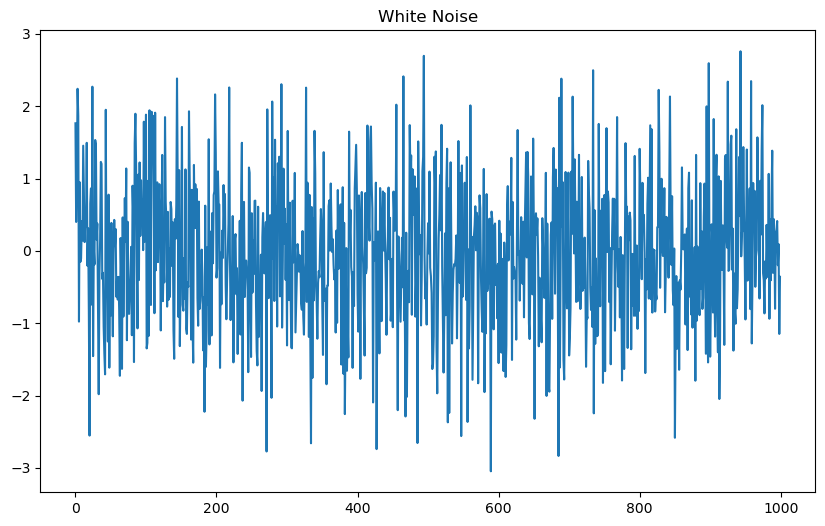

In [6]:
# import numpy as np

# Generate white noise
np.random.seed(0)
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# mean μ=0, standard deviation σ=1, 1000 random samples

# Plot white noise
plt.figure(figsize=(10, 6))
plt.plot(white_noise)
plt.title('White Noise')
plt.show()

### 2.2 Moving Averages
**Definition**: A technique to smooth time series data by averaging adjacent data points.

**Simple Moving Average (SMA)**: Calculating the average of data points within a specified window.

**Exponential Moving Average (EMA)**： A type of moving average that gives more weight to recent observations.

Examples: Calculating SMA and EMA in Python

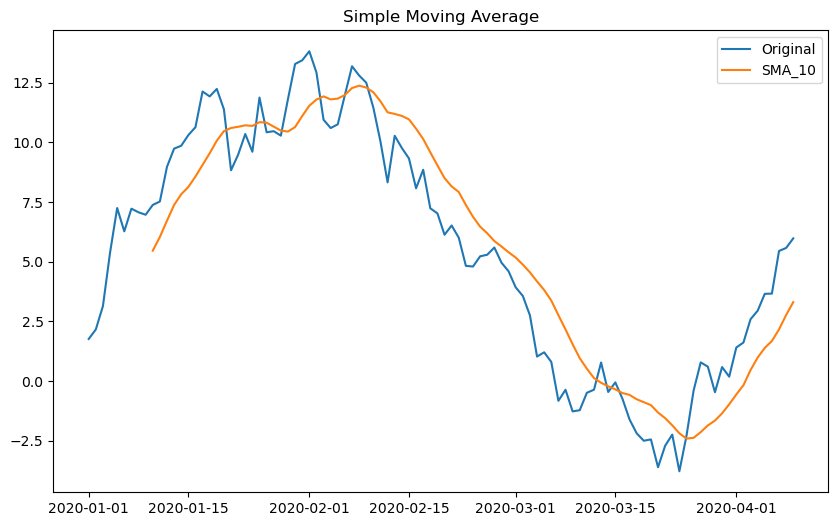

In [8]:
# Calculate Simple Moving Average (SMA)
df['SMA_10'] = df['Value'].rolling(window=10).mean()

# Plot original series and SMA
plt.figure(figsize=(10, 6))
plt.plot(df['Value'], label='Original')
plt.plot(df['SMA_10'], label='SMA_10')
plt.title('Simple Moving Average')
plt.legend()
plt.show()

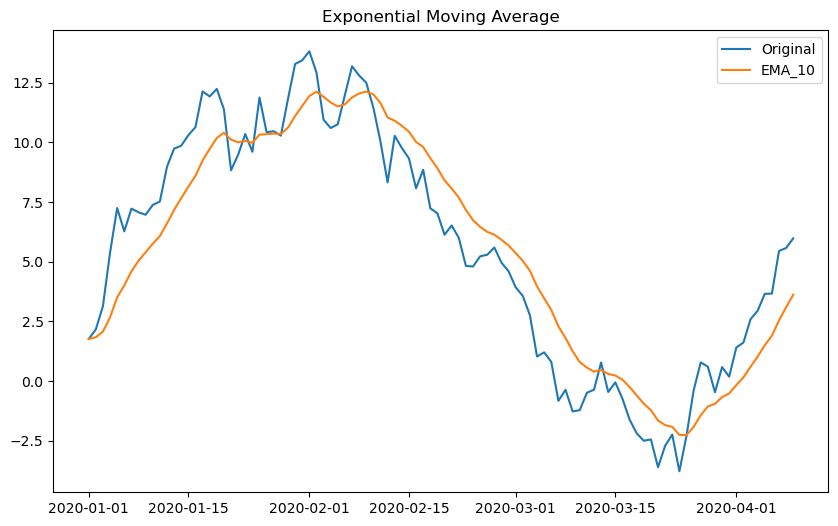

In [9]:
# Calculate Exponential Moving Average (EMA)
df['EMA_10'] = df['Value'].ewm(span=10, adjust=False).mean()
# 'span' controls the decay in the weighting (how quickly the weights decrease)
# 'span=10': the effective size of the window is around 10 observations
# 'adjust=True (default)': weights adjusted so that sum=1. 
# 'adjust=False': weights calculated recursively.

# Plot original series and EMA
plt.figure(figsize=(10, 6))
plt.plot(df['Value'], label='Original')
plt.plot(df['EMA_10'], label='EMA_10')
plt.title('Exponential Moving Average')
plt.legend()
plt.show()

### 2.3 Comparison of SMA and EMA

1. **SMA** - identify long-term trends and reduce noise

- Advantages:
    - Smooths out short-term fluctuations and highlights longer-term trends.

- Disadvantages:
    - Each data point in the window has equal weight, which might not be ideal in all situations.
    - It can lag behind the actual data due to the averaging process.
    - Can be sensitive to outliers.


2. **EMA** - detect short-term changes


- Advantages:
    - Puts more weight on recent data points, making it more responsive to new information.
    - Better at capturing recent trends compared to SMA.
    - Less lag compared to SMA.


- Disadvantages:
    - Can be more volatile and react to short-term fluctuations, which might not always be desirable.


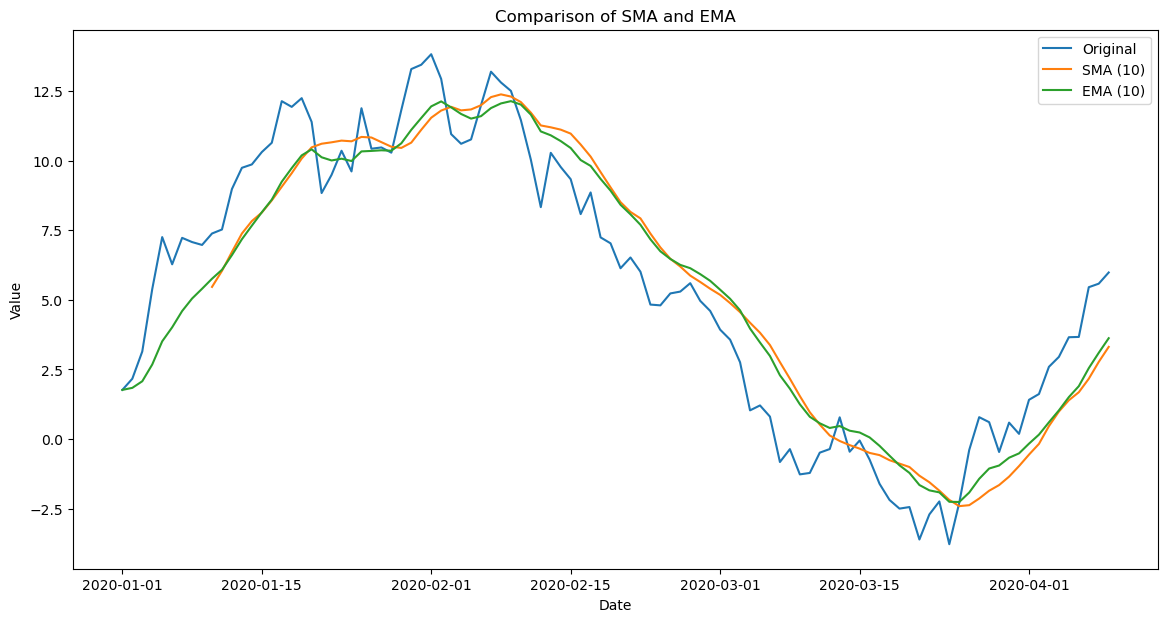

In [10]:
# Plotting the original series, SMA, and EMA
plt.figure(figsize=(14, 7))
plt.plot(df['Value'], label='Original', linewidth=1.5)
plt.plot(df['SMA_10'], label='SMA (10)', linewidth=1.5)
plt.plot(df['EMA_10'], label='EMA (10)', linewidth=1.5)
plt.title('Comparison of SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


**Key Points to Consider**:
1. **Lag Effect**:

SMA tends to have a greater lag effect than EMA. If the goal is to identify recent changes quickly, EMA is preferred.

2. **Smoothing Effect**:

SMA provides a smoother curve, which can be useful for long-term trend analysis. EMA, while more responsive, can also reflect short-term noise.

3. **Choice of Window/Span**:

The choice of window size for SMA or span for EMA significantly affects the smoothing. Smaller windows/spans make the averages more sensitive to recent changes, while larger windows/spans smooth out the data more.

### Exercises

1. Below is a real-world time series data-the histroical closing prices for Apple Inc.

In [ ]:
pip install pandas yfinance matplotlib

# skip this if you have done this before

[*********************100%%**********************]  1 of 1 completed


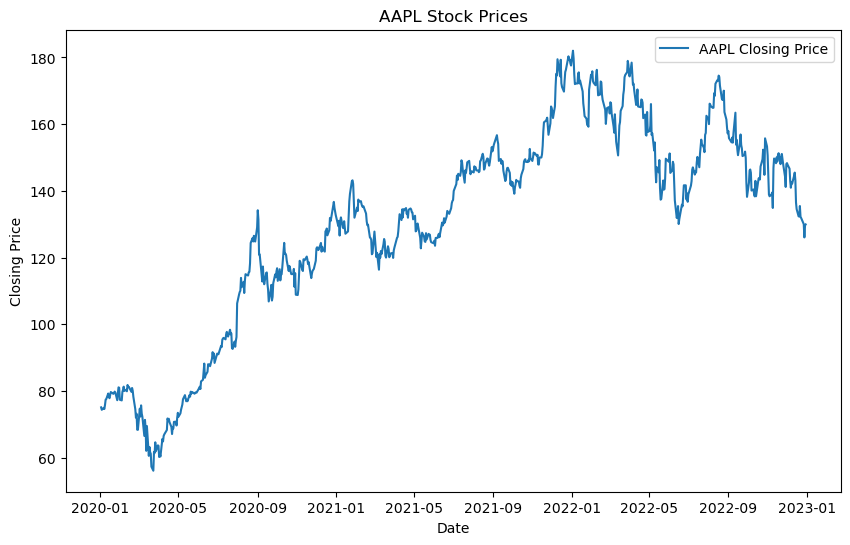

In [14]:
import yfinance as yf
#import pandas as pd
#import matplotlib.pyplot as plt

# Historical stock prices for Apple Inc.
ticker = 'AAPL'
apple_df = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(apple_df['Close'], label='AAPL Closing Price')
plt.title('AAPL Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


1a. Calculate basic statistics (mean, median, standard deviation) of the time series. 

1b. Plot a histogram for the distribution of the closing prices.

1c. Smooth the data using both SMA and EMA with appropriate choices of window sizes and span values.

2. Generate two white noise series with different parameters (mean and variance) and plot them on the same graph.